

# Lab 1 : Probability Theory

# By Miriyala Pranay Kamal, EE, 200030033

1.   Sampling from uniform distribution
2.   Sampling from Gaussian distribution
3.   Sampling from categorical distribution through uniform distribution
4.   Central limit theoram
5.   Law of large number
6.   Area and circumference of a circle using sampling
7.   Fun Problem

**There are missing fields in the code that you need to fill to get the results but note that you can write you own code to obtain the results**







## 1.Sampling from uniform distribution

a) Generate N points from a uniform distribution range from [0 1]


In [1]:
#import libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
#Generate N points from a uniform distribution range from [0 1]

def generateUniform(n):
    output = []
    for i in range(n):
        randFloat = float(np.random.uniform(0,10**5)/10**5)
        output.append(randFloat)
    
    return output
        

In [3]:
N = 10

X = generateUniform(N)

print('Points from uniform distribution : ', X)

Points from uniform distribution :  [0.31952390032412314, 0.2791969059010606, 0.28154851855304697, 0.8635480381182425, 0.011816775179863903, 0.17463914725608776, 0.5018084083143125, 0.38943433995654525, 0.5259516698277804, 0.38419864713421736]


b) Show with respect to no. of sample, how the sampled distribution converges to parent distribution.



In [4]:
# Creating an numpy array of different values of no. of samples, let the length of the array be 5

arr = []
for i in range(1,6):
    output = 10**i
    arr.append(output)
    
arr = np.array(arr)

In [5]:
type(arr)

numpy.ndarray

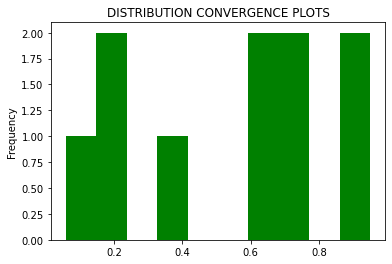

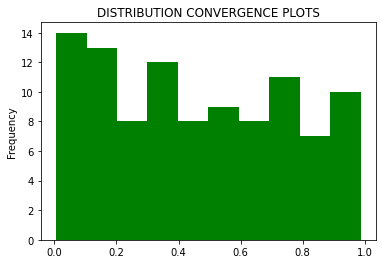

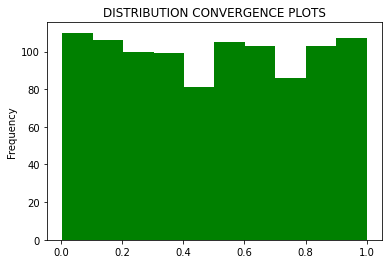

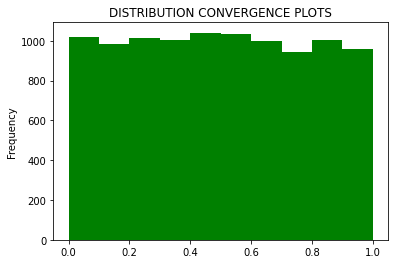

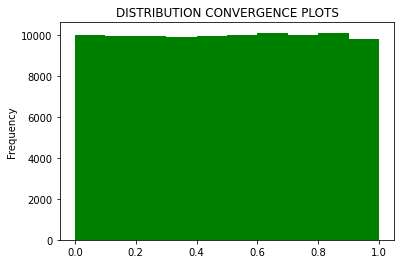

In [6]:
# Generating i points from a uniform distribution range from [0 1]

#fixing the random values
np.random.seed(42)

for i in arr:
    y = generateUniform(i)
    plt.hist(y, color = 'green')
    plt.title('DISTRIBUTION CONVERGENCE PLOTS')
    plt.ylabel('Frequency')
    plt.show()

c) Law of large numbers: $average(x_{sampled})=\bar{x}$, where x is a uniform random variable of range [0,1], thus $\bar{x}=\int_{0}^{1} x f(x) dx=0.5$

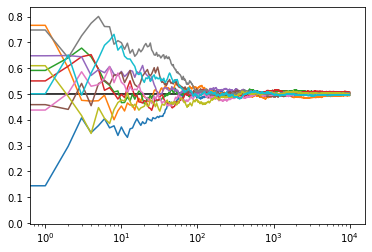

In [7]:
# Law of large numbers : plotting the mean_samples

#defining parameters
n = 10**4

iterate = 10
plt.figure()

#mean line
meanLine = np.tile(0.5,n)
plt.semilogx(meanLine,color='k')

mean_sampled = []

for i in range(iterate):

    uniformValues = generateUniform(n)

    i = np.arange(1,n+1,1)
    mean_sampled = np.cumsum(uniformValues)
    mean_sampled = mean_sampled/i
    
    plt.semilogx(mean_sampled)

## 2. Sampling from Gaussian Distribution

a) Draw univariate Gaussian distribution (mean 0 and unit variance)






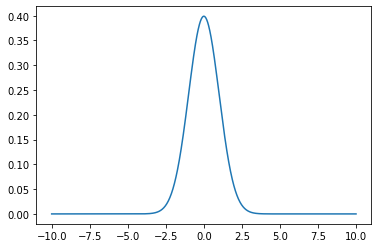

In [8]:
#Draw univariate Gaussian distribution (mean 0 and unit variance)

xAxis = np.linspace(-10,10,1000)

#UVGD

mean = 0
variance = 1

gaussDistribution = stats.norm.pdf(xAxis, mean, variance)

plt.plot(xAxis, gaussDistribution)

b) Sample from a univariate Gaussian distribution, observe the shape by changing the no. of sample drawn.



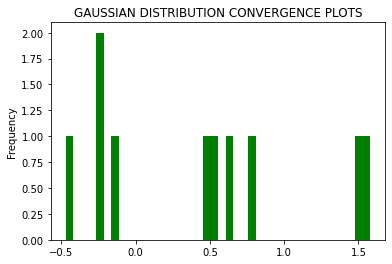

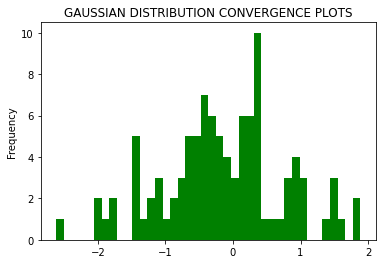

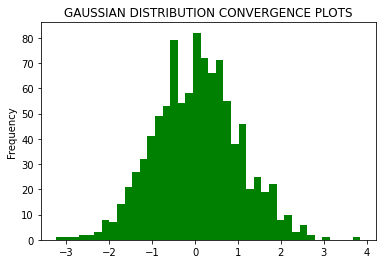

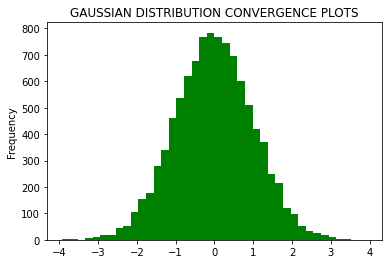

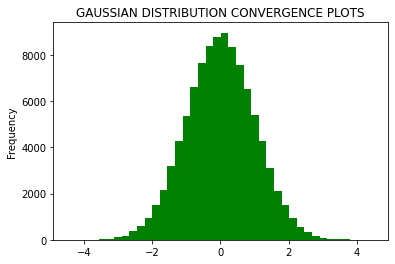

In [9]:
# Generate i points from a uniform distribution range from [0 1]

#fixing the random values
np.random.seed(42)

for i in arr:
    y = np.random.normal(mean, variance, i)
    plt.hist(y, color = 'green', bins = 40)
    plt.title('GAUSSIAN DISTRIBUTION CONVERGENCE PLOTS')
    plt.ylabel('Frequency')
    plt.show()

c) Law of large number


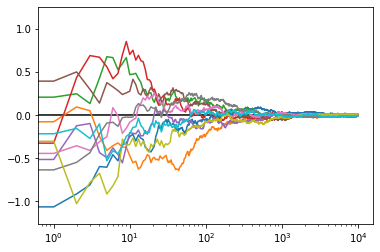

In [10]:
# Law of large numbers

#plotting the mean_samples

#create iterations vector
n = 10**4
iterations = 10
plt.figure()

#mean line
meanLine = np.tile(0.0,n)
plt.semilogx(meanLine,color='k')

mean_sampled = []

#fixing the random values
for i in range(iterations):

    uniformValues = np.random.normal(mean, variance, n)

    i = np.arange(1,n+1,1)
    mean_sampled = np.cumsum(uniformValues)
    mean_sampled = mean_sampled/i
    
    plt.semilogx(mean_sampled)

## 3.Sampling of categorical from uniform

i) Generate n points from uniforms distribution range from [0 1] (Take large n)

ii) Let $prob_{0} = 0.3$, $prob_{1} = 0.6$ and $prob_{2} = 0.1$ 

iii) Count the number of occurences and divide by the number of total draws for 3 scenarios : 
  1. $p_{0}$ : $<$ $prob_{0}$ 
  2. $p_{1}$ : $<$ $prob_{1}$
  3. $p_{2}$ : $<$ $prob_{2}$


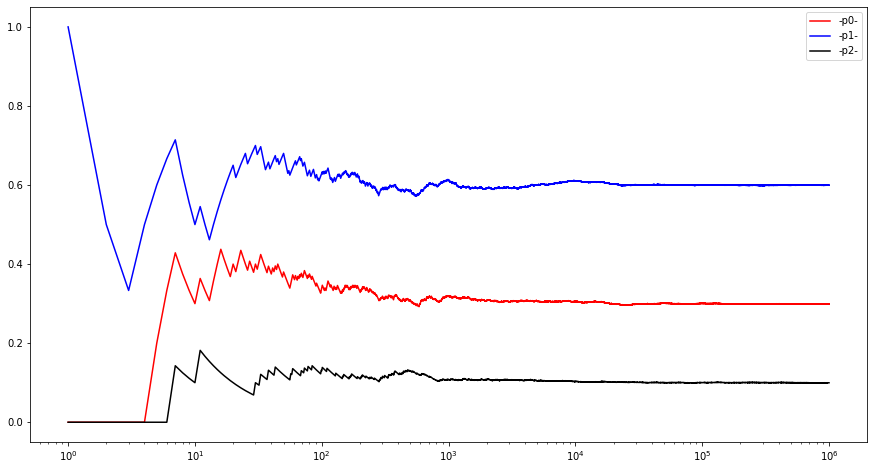

In [11]:
#create iterations vector
n = 10**6
d = 10**3
a = 10**3

iterations = []

for i in range(int(n/d)):
    iterations.append(a + i*d)
    
#probabilites
prob0 = 0.3 
prob1 = 0.6
prob2 = 0.1

#uniform distribution
np.random.seed(42)
uniformDist = np.random.uniform(0,1,n)

i = np.arange(1,n+1,1)
p0 = np.cumsum(uniformDist<prob0)
p1 = np.cumsum(uniformDist<prob1)
p2 = np.cumsum(uniformDist<prob2)

p0 = p0/i
p1 = p1/i
p2 = p2/i
    
x = np.arange(1, n+1)
plt.figure(figsize=(15, 8))
plt.semilogx(x, p0,color='r')
plt.semilogx(x, p1,color='b')
plt.semilogx(x,p2,color='k')
plt.legend(['-p0-','-p1-','-p2-'])

## 4. Central limit theorem

a) Sample from a uniform distribution (-1,1), some 10000 no. of samples 1000 times (u1,u2,....,u1000). show addition of iid rendom variables converges to a Gaussian distribution as number of variables tends to infinity.

(array([1014., 1006.,  950., 1021., 1035.,  977.,  984., 1035.,  981.,
         997.]),
 array([-9.99851919e-01, -7.99873756e-01, -5.99895593e-01, -3.99917430e-01,
        -1.99939267e-01,  3.88963020e-05,  2.00017059e-01,  3.99995222e-01,
         5.99973385e-01,  7.99951548e-01,  9.99929711e-01]),
 <BarContainer object of 10 artists>)

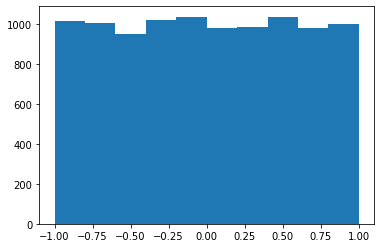

In [12]:
#Sample from a uniform distribution (-1,1), some 10000 no. of samples 1000 times (u1,u2,....,u1000)
#show addition of iid rendom variables converges to a Gaussian distribution as number of variables tends to infinity.

sampleSize = 10**4
turns = 10**3

uniformSamples = []

for i in range(turns):
    uniformSamples.append(np.random.uniform(1, -1, sampleSize))
    
#uniform distribution for each IID
plt.hist(uniformSamples[0])

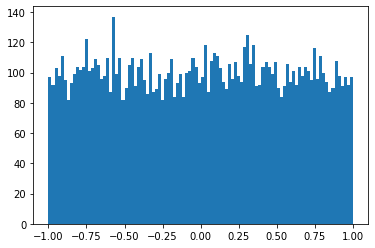

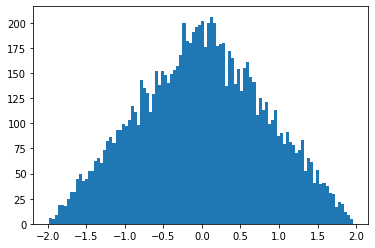

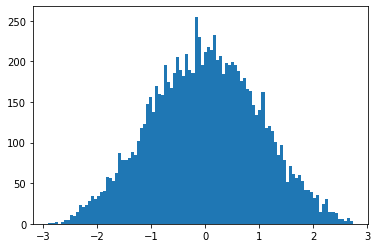

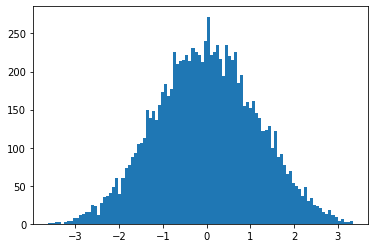

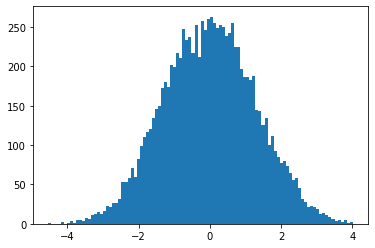

In [13]:
#uniform distribution
    
xVector = np.arange(1, turns+1, 1)

gaussianAprrox = np.zeros(sampleSize)

n = [50, 100, 250, 500, 999]

for i in n:
    gaussianAprrox += uniformSamples[i]
    
    plt.hist(gaussianAprrox, bins = 100)
    plt.show()

## 5. Computing $\pi$ using sampling

a) Generate 2D data from uniform distribution of range -1 to 1 and compute the value of $\pi$.

b) Equation of circle
$$x^{2}+y^{2}=1$$

c) Area of a circle can be written as:
$$\frac{No~of~points~(x^{2}+y^{2}<=1)}{Total~no.~generated~points}=\frac{\pi r^{2}}{(2r)^{2}}$$
where r is the radius of the circle and $2r$ is the length of the vertices of square.


computed value of pi= 3.1425048


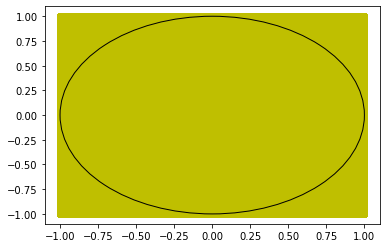

In [14]:
radius = 1

n = 10**7
x = np.random.uniform(-1, 1, size=[n,2])

fig = plt.gcf()
ax = fig.gca()

#Scatter plot of x
ax.scatter(x[:,0],x[:,1],color='y')

#number of points inside the circle
circlePoints = 0
for i in range(n):
    if x[i][0]**2 + x[i][1]**2 <= 1:
        circlePoints += 1

circle1 = plt.Circle((0, 0), 1,fc='None',ec='k')
ax.add_artist(circle1) # plotting circle of radius 1 with centre at (0,0)

piSampled = circlePoints/n
piSampled = 4*piSampled

print('computed value of pi=',piSampled)

## 6. Monty Hall problem

Here's a fun and perhaps surprising statistical riddle, and a good way to get some practice writing python functions

In a gameshow, contestants try to guess which of 3 closed doors contain a cash prize (goats are behind the other two doors). Of course, the odds of choosing the correct door are 1 in 3. As a twist, the host of the show occasionally opens a door after a contestant makes his or her choice. This door is always one of the two the contestant did not pick, and is also always one of the goat doors (note that it is always possible to do this, since there are two goat doors). At this point, the contestant has the option of keeping his or her original choice, or swtiching to the other unopened door. The question is: is there any benefit to switching doors? The answer surprises many people who haven't heard the question before.

Follow the function descriptions given below and put all the functions together at the end to calculate the percentage of winning cash prize in both the cases (keeping the original door and switching doors)

Note : You can write your own functions, the below ones are given for reference, the goal is to calculate the win percentage
 
Try this fun problem and if you find it hard, you can refer to the solution [here](https://nbviewer.jupyter.org/github/cs109/2014/blob/master/homework-solutions/HW0_solutions.ipynb)

In [15]:
"""
Function
--------
simulate_prizedoor

Generate a random array of 0s, 1s, and 2s, representing
hiding a prize between door 0, door 1, and door 2

Parameters
----------
nsim : int
    The number of simulations to run

Returns
-------
sims : array
    Random array of 0s, 1s, and 2s

Example
-------
>>> print simulate_prizedoor(3)
array([0, 0, 2])
"""
def simulate_prizedoor(nsim):
    #compute here
    return answer
#your code here

def simulate_prizedoor(nsim):
    return np.random.randint(0, 3, (nsim))

In [16]:
"""
Function
--------
simulate_guess

Return any strategy for guessing which door a prize is behind. This
could be a random strategy, one that always guesses 2, whatever.

Parameters
----------
nsim : int
    The number of simulations to generate guesses for

Returns
-------
guesses : array
    An array of guesses. Each guess is a 0, 1, or 2

Example
-------
>>> print simulate_guess(5)
array([0, 0, 0, 0, 0])
"""
#your code here

def simulate_guess(nsim):
    return np.zeros(nsim, dtype=np.int)

In [17]:
"""
Function
--------
goat_door

Simulate the opening of a "goat door" that doesn't contain the prize,
and is different from the contestants guess

Parameters
----------
prizedoors : array
    The door that the prize is behind in each simulation
guesses : array
    THe door that the contestant guessed in each simulation

Returns
-------
goats : array
    The goat door that is opened for each simulation. Each item is 0, 1, or 2, and is different
    from both prizedoors and guesses

Examples
--------
>>> print goat_door(np.array([0, 1, 2]), np.array([1, 1, 1]))
>>> array([2, 2, 0])
"""
#your code here

def goat_door(prizedoors, guesses):
    
    #strategy: generate random answers, and
    #keep updating until they satisfy the rule
    #that they aren't a prizedoor or a guess
    result = np.random.randint(0, 3, prizedoors.size)
    while True:
        bad = (result == prizedoors) | (result == guesses)
        if not bad.any():
            return result
        result[bad] = np.random.randint(0, 3, bad.sum())

In [18]:
"""
Function
--------
switch_guess

The strategy that always switches a guess after the goat door is opened

Parameters
----------
guesses : array
     Array of original guesses, for each simulation
goatdoors : array
     Array of revealed goat doors for each simulation

Returns
-------
The new door after switching. Should be different from both guesses and goatdoors

Examples
--------
>>> print switch_guess(np.array([0, 1, 2]), np.array([1, 2, 1]))
>>> array([2, 0, 0])
"""
#your code here

def switch_guess(guesses, goatdoors):
    result = np.zeros(guesses.size)
    switch = {(0, 1): 2, (0, 2): 1, (1, 0): 2, (1, 2): 0, (2, 0): 1, (2, 1): 0}
    for i in [0, 1, 2]:
        for j in [0, 1, 2]:
            mask = (guesses == i) & (goatdoors == j)
            if not mask.any():
                continue
            result = np.where(mask, np.ones_like(result) * switch[(i, j)], result)
    return result

In [19]:
"""
Function
--------
win_percentage

Calculate the percent of times that a simulation of guesses is correct

Parameters
-----------
guesses : array
    Guesses for each simulation
prizedoors : array
    Location of prize for each simulation

Returns
--------
percentage : number between 0 and 100
    The win percentage

Examples
---------
>>> print win_percentage(np.array([0, 1, 2]), np.array([0, 0, 0]))
33.333
"""
#your code here

def win_percentage(guesses, prizedoors):
    return 100 * (guesses == prizedoors).mean()

In [20]:
#your code here

nsim = 10000

#keep guesses
print("Win percentage when keeping original door")
print(win_percentage(simulate_prizedoor(nsim), simulate_guess(nsim)))

#switch
pd = simulate_prizedoor(nsim)
guess = simulate_guess(nsim)
goats = goat_door(pd, guess)
guess = switch_guess(guess, goats)
print("Win percentage when switching doors")
print(win_percentage(pd, guess).mean())

Win percentage when keeping original door
32.93
Win percentage when switching doors
65.93


C:\Users\PRANAY~1\AppData\Local\Temp/ipykernel_19716/3810020430.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.zeros(nsim, dtype=np.int)


In [21]:
#3 door monte hall problem - own solution

#The possible configurations of doors are

#1 represents the prize, and 0 represents the goats
doors = [[0,0,1], [0,1,0], [1,0,0]]
turns = 10**5

win_percentage_stay = 0

for i in range(turns):

    #choosing one of the possible configurations for doors
    configuration = doors[np.random.randint(0, 3)]

    #our choice
    choice = np.random.randint(0, 3)
    
    if configuration[choice] == 1:
        win_percentage_stay = win_percentage_stay + 1
        
win_percentage_stay = (win_percentage_stay/turns)*100
print('Percentage of winning if we stay with our choice in monte hall problem is', win_percentage_stay)

print('Percentage of winning if we switch our choice in monte hall problem is', 100 - win_percentage_stay)

print('Hence we can say that percentage of us winning is high, if we switch our choice')

Percentage of winning if we stay with our choice in monte hall problem is 33.076
Percentage of winning if we switch our choice in monte hall problem is 66.924
Hence we can say that percentage of us winning is high, if we switch our choice
